# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Oct 1, 9PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Rahul Gupta  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: 1008661958

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).


 <font color='red'>**Remember to push your work on GitHub and share the link of your private repo on Quercus.**</font> 




# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 30
* How many observations have a 'mean area' of greater than 700? 171
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [ ]:
dataset
#data1.shape

target_value = dataset.target
data1 = dataset.data
feature_nm = dataset.feature_names

d = target_value.reshape(-1,1)
a = feature_nm.reshape(-1,1)

c = np.append(data1,d,axis=1)                              # Adding target column in data
c.shape

e = np.array(['targets'])                                  # Target column name
f= np.append(feature_nm,e)                                 # Adding target column name
df = pd.DataFrame(data = c , columns = f)                  # creating a panda dataframe

#c = np.array(final)
#b = target_value.sum()


In [ ]:
feature_nm.shape                                           # No of features
np.sum(df['mean area']>700)
(df['targets']==0).sum()
(df['targets']==1).sum()
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targets
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [ ]:
x_train.shape

(398, 30)

In [ ]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data1,target_value, test_size = 0.3,random_state=0)




### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




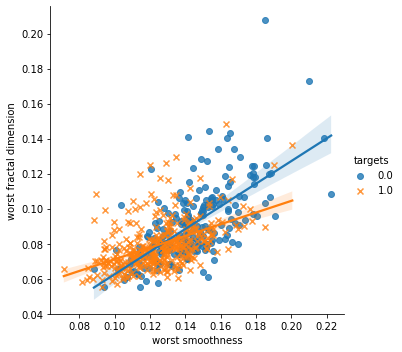

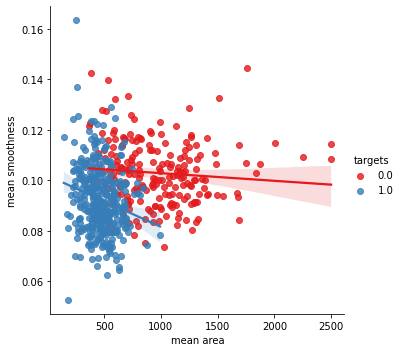

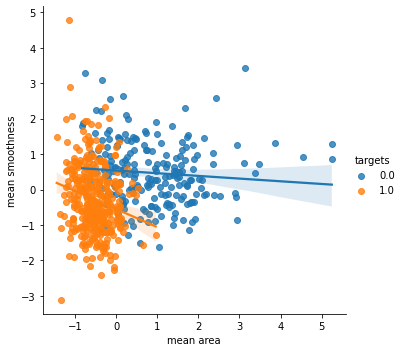

In [ ]:
### YOUR CODE HERE ###
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
plot = sns.lmplot(x='worst smoothness',y='worst fractal dimension',hue='targets',data=df,markers=['o','x'])
print(plot)

#without standardization
plot_without_stdn = sns.lmplot(x='mean area',y='mean smoothness',hue='targets',data=df,palette='Set1')

# With Standardization
stdarea= df['mean area'].to_numpy()
stdsmooth = df['mean smoothness'].to_numpy()

stdarea = stdarea.reshape(-1,1)
stdsmooth = stdsmooth.reshape(-1,1)

scale1 = StandardScaler().fit(stdarea)
y_std = scale1.transform(stdarea)

scale2 = StandardScaler().fit(stdsmooth)
x_std = scale2.transform(stdsmooth)
df1 = df.copy()
df1['mean area'] = y_std
df1['mean smoothness'] = x_std

plot_with_stdn = sns.lmplot(x = 'mean area',y='mean smoothness',hue='targets',data = df1)

#plots
print(plot_without_stdn)
print(plot_with_stdn)


#df1['mean area'].mean()
#stdarea = df['mean area'].values.copy
#stdarea = stdarea-x
#stdarea = stdarea/y



**Ans Explanation:**- By observing graph of Unstandardized and standardized data, we can tell that physically there is no difference in the graphs. Difference is there in their scale range of axis.

Earlier(i.e.without Std) mean area ranged from 500 to 2500 which was very large , but now after standardization it ranges from -1 to 5. Therefore, scaling of features has been done and now it can be fit to the model.

One of the major advanatges of Standardization is feature rescaling which inturn leads to demolition of biasness. If features have different scales then algorithm can do partiality and may favour high value feature. In order to avoid this, we do standardization. It is very much effective in Models like KNN as they depend on euclidean distance method.

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




(array([ 9, 10]),) 0.9346518987341772


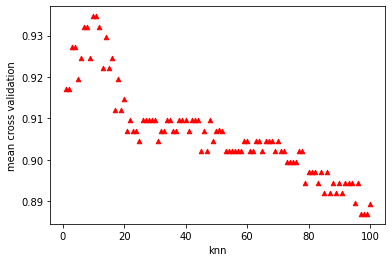

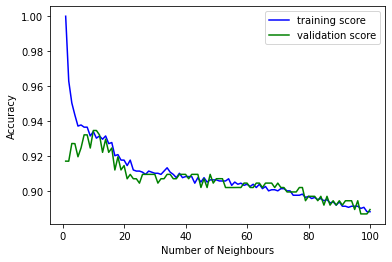

In [ ]:
### YOUR CODE HERE ###
from sklearn import neighbors
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt


# Q1...........................................................................................................
mean_cva = []
train_score = []
k = []
aloha= []

for i in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors = i)
  scores = cross_validate(knn,x_train,y_train,cv=5,return_train_score=True)
  mean_cva = np.append(mean_cva,scores['test_score'].mean())
  train_score = np.append(train_score,scores['train_score'].mean())
  k = np.append(k,i)
  


#plot code

plt.figure(1)                                          #........................ reference 5
plt.scatter(k,mean_cva,s=20,color = 'r',marker='^')    # .......................marker in reference 7
plt.xlabel('knn') 
plt.ylabel('mean cross validation')


# Q2.......................................................................................................
max_mcva = mean_cva.max()  # highest cross validation accuracy
index1 = np.where(mean_cva == max_mcva) # k value
print(index1,max_mcva)

# ans2 highest cross validation accuracy is 0.93465 i.e.93.465% and best k is at both 9 and 10 ,i.e. Both the values of k have same cva. For simplicity, we will choose first one, that is k=9

# Q3........................................................................................................

plt.figure(2)
plt.plot(k,train_score,label='training score',color = 'b')
plt.plot(k,mean_cva,label='validation score',color='g')
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.legend()


plt.show()





**Q2 ans**: Highest cross validation accuracy is 0.93465 i.e.93.465% and best k is at both 9 and 10 ,i.e. Both the values of k have same cva. For simplicity, we will choose first one, that is k=9.

**Q3 ans**: Observing the graph, we can infer that in -
 
        range of 0-10 It is underfitted
        range of 42-50 and 80-90 it is overfitted.

## Part 3: Feature Selection [4 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use the following link to get familiar with extracting the feature impotance order of machine learning algorithms in Python: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to remove another feature. To do that we fit a new decision tree to the remaining features and identify the least important feature. 


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[3]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Each time, removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 1, fit a new tree on the reduced dataset and follow all the steps until you meet the stop condition. 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
from sklearn import tree

best_mean_cva = []
best_mean_cva_store=[]
corresp_k = []
feature_removed = []
ft = feature_nm.copy()



In [ ]:
def Feature_selector (X_train , Y_train , tr=0.95):
## code here ##

  mean_cva1= []       # defining some variables
  global best_mean_cva_store, corresp_k, feature_removed,ft
  Y_train1 = Y_train
  
# finding importance score
  dt = tree.DecisionTreeClassifier()
  dt.fit(X_train,Y_train)
  importance = dt.feature_importances_

  ind_min_score = np.where(importance==importance.min())              # index position of features having min score. It might contain multiple features having same least scores.
  x1_train1 = X_train.copy() 
  x1_train1 = np.delete(x1_train1,ind_min_score[0][0],axis=1)         # removing 1 least important feature as it might contain multiple features and we want to remove one at a time.#refernce 6

  for i in range(1,101):
    knn_1 = neighbors.KNeighborsClassifier(n_neighbors = i)
    scores1 = cross_validate(knn_1,x1_train1,Y_train,cv=5)
    mean_cva1 = np.append(mean_cva1,scores1['test_score'].mean())

  best_mean_cva = mean_cva1.max()                                     # highest cross validation accuracy
  index = np.where(mean_cva1 == best_mean_cva)                        # k value

  best_mean_cva_store = np.append(best_mean_cva_store,best_mean_cva)  # stores best mcva of iteration
  corresp_k = np.append(corresp_k,index[0][0])                        # stores it corresponding value

  name_feature = ft[ind_min_score[0][0]]
  feature_removed = np.append(feature_removed,name_feature)           # storing removed feature
  ft = np.delete(ft,ind_min_score[0][0])                              # removing the feature name so that it can be used in next iteration
  

  ######## Condition ########

  if (len(ft)==1) or (best_mean_cva < (tr * max_mcva)):
    return feature_removed, best_mean_cva_store, corresp_k

  else:
    return Feature_selector(x1_train1,Y_train1)
  

In [ ]:
fr, bmcva, corr_k= Feature_selector(x_train,y_train)

# fr     : features removed, equal to feature_removed
# bmcva  : best mean cva stored for each iteration, equal to best_mean_cva_store
# corr_k : Corresponding value of k for bmca, equal to corresp_k


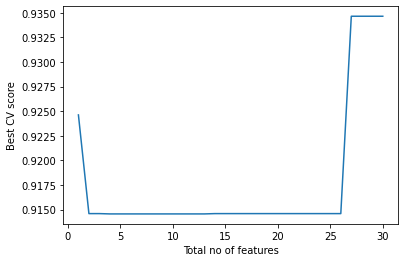

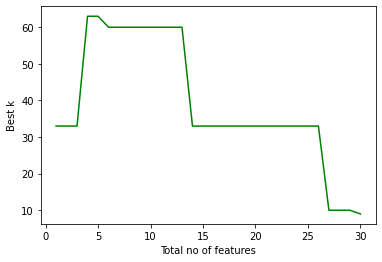

In [ ]:
# Plt 1 : Best cv score vs Total features

plt.figure(3)
x_axis = [30] 
no_of_features = np.arange(len(fr),0,-1)
x_axis = np.append(x_axis,no_of_features)
y_axis = max_mcva.copy()
y_axis = np.append(y_axis,bmcva)

plt.plot(x_axis,y_axis)
plt.xlabel("Total no of features")
plt.ylabel("Best CV score")
plt.show()

# plt 2 : Best k value vs Total features

plt.figure(4)
y_axis1 = index1[0][0].copy()
y_axis1 = np.append(y_axis1,corr_k)
plt.plot(x_axis,y_axis1,color='g')
plt.xlabel("Total no of features")
plt.ylabel("Best k")
plt.show()


## Part 4: Standardization [1.5 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**


In [ ]:
### YOUR CODE HERE ###

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


########## Q1 ###########

x_train1 = x_train.copy()
scale_xtrain = StandardScaler().fit(x_train1) # scaler for x training set
x_train_std = scale_xtrain.transform(x_train1) # standardized x_train

x_test1 = x_test.copy()
x_test_std = scale_xtrain.transform(x_test1)  # Transformed test set using standard scaler of training set.


y_train1 = y_train.reshape(-1,1).copy()

In [ ]:
########## Q2 ############
best_mean_cva = []
best_mean_cva_store=[]
corresp_k = []
feature_removed = []
ft = feature_nm.copy()

fr1, bmcva1, corr_k1 = Feature_selector(x_train_std ,y_train)

# fr     : features removed, equal to feature_removed on std data
# bmcva  : best mean cva stored for each iteration, equal to best_mean_cva_store on std data
# corr_k : Corresponding value of k for bmca, equal to corresp_k on std data


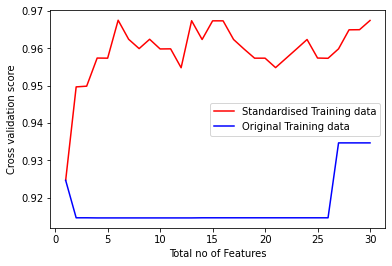

In [ ]:
# To find std best mcva for full feature, we input x_train_std and y_train in part 2 and find std mcva for full feature. I didnt include full feature mcva in part 3 inorder to save time.
# value which i got from part 2 of std best mcva is 0.9674367088607594.

bmcva2 = [0.9674367088607594]                    # best mcva at full feature
bmcva2 = np.append(bmcva2,bmcva1)

x_axis1 = [30]                                   # full feature no
no_of_features1 = np.arange(len(fr1),0,-1)
x_axis1 = np.append(x_axis1,no_of_features1)

plt.plot(x_axis1,bmcva2,color='r',label='Standardised Training data')
plt.plot(x_axis1,y_axis,color='b',label='Original Training data')
plt.xlabel('Total no of Features')
plt.ylabel('Cross validation score')
plt.legend()
plt.show()

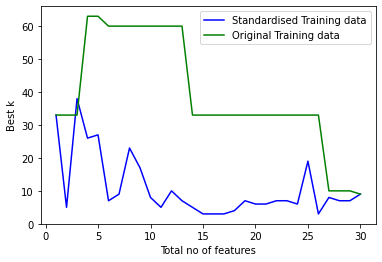

In [ ]:
############### Q3 ##############

# We will also plot K in std and unstd vs total features to get better idea and then we will analyze it in the below answer.

std_yaxis = index1[0][0].copy()                           # k value when features are full i.e. 0 rempved
std_yaxis = np.append(std_yaxis,corr_k1)

plt.plot(x_axis1,std_yaxis,color='b',label='Standardised Training data')
plt.plot(x_axis1,y_axis1,color='g',label='Original Training data')

plt.xlabel("Total no of features")
plt.ylabel("Best k")
plt.legend()

plt.show()

**Q3 ans:-** We can clearly see that standardization has helped us a lot as our cross validation score has increased from 93.5% to 96.8% (approx).

By Observing standardized data graph of cva,we can see that as the features decrease, the cross validation accuracy also decreases.Although, there are some discrepancies in between, but still in the end(1feature) it is low compared to full feature.
From the Std graph we can see that, when No of features = 10,14,17,30 we have high cross validation accuracy score.

By observing standardized data of k, we can see that as the faetures got reduced, best value of K got increased. Though, there were ups and down, but still in the end, one feature, it reached peak of nearly 32 neighbors.
But still all the best K were below k=35. Comapred to this, Unstandardised data points show a different picture.There, k reached a peak of 63(approx) and most of the time, k value was above 35.

Disclaimer: all the values are approx as they have been perecived from the graph. Also, graphs were changing and so numbers might change but inference remains same. Sorry for the inconvenience.

## Part 5: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

In [ ]:
### YOUR CODE HERE ###

# I am picking the data from part 3 feature selection model. Highest cva was 0.9346518987341772 and corresponding k value was 9. It was unstandardized data.No of features removed=0

from sklearn import neighbors
from sklearn.metrics import accuracy_score

knn_final = neighbors.KNeighborsClassifier(n_neighbors=9)
knn_final.fit(x_train,y_train)

accuracy = accuracy_score(y_test,knn_final.predict(x_test))
print('Test set accuracy is',accuracy*100,'%')



Test set accuracy is 95.90643274853801 %


After applying the model created in part 3, we came to conclusion that accuracy for test set is 95.9% which is greater that best mean cross validation accuracy,93.4%, and therefore we can conclude that our model is trained well and its prediction is quite accurate. Also we can observe that it also not an underfitted and neither overfitted. 
Therfore, it is a success!!!!!

*References*:


 https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

 https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/

3. https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

4. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy

5. https://stackoverflow.com/questions/42595052/show-2-plots-at-same-time-instead-of-one-after-another-in-matplotlib

6. https://thispointer.com/delete-elements-rows-or-columns-from-a-numpy-array-by-index-positions-using-numpy-delete-in-python/

7. https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
